In [737]:
import pandas as pd
import seaborn as sns
import numpy as np

import warnings
warnings.filterwarnings('ignore')

kospi =  pd.read_csv("./kospi(최종).csv")
kospi

,회사명,종목코드,회계년도,종가,ROE,상장주식수,시가총액,수익률,PER,PBR,PCR,PSR,ROA,NEW,EY,수정종가
0,DB하이텍,990,2014,4615.0,-47.32,44367832.0,2.047575e+11,0.310559,0.000,3.635,5.695,0.475,-7.819136,0.446111,0.153846,6640.0
1,DB하이텍,990,2015,14300.0,67.63,44367832.0,6.344600e+11,-1.144578,4.105,2.150,3.480,0.785,12.870986,0.165039,0.195695,5880.0
2,DB하이텍,990,2016,15900.0,29.65,44367832.0,7.054485e+11,20.782313,8.260,2.145,2.945,0.940,8.952679,0.166677,0.246305,18100.0
3,DB하이텍,990,2017,12000.0,27.62,44367832.0,5.324140e+11,1.243094,10.395,1.910,4.245,1.140,11.084563,0.207305,0.269542,20350.0
4,DB하이텍,990,2018,10850.0,17.12,44398588.0,4.817247e+11,-3.046683,7.210,1.360,3.755,1.025,8.141211,0.212452,0.268097,14150.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1334,효성첨단소재,298050,2021,596000.0,41.51,4479948.0,2.670049e+12,51.001642,15.085,4.550,16.070,2.385,11.346144,0.074404,0.034554,371500.0
1335,효성첨단소재,298050,2022,333500.0,19.11,4479948.0,1.494063e+12,4.051144,9.525,3.070,8.875,2.355,5.460103,0.138510,0.069686,522000.0
1336,효성티앤씨,298020,2020,211000.0,25.10,4327682.0,9.131409e+11,-4.189944,10.240,1.375,3.240,0.200,5.958373,0.254025,0.103734,104000.0
1337,효성티앤씨,298020,2021,521000.0,76.22,4327682.0,2.254722e+12,43.653846,9.165,4.770,12.370,0.555,22.266860,0.122155,0.149925,558000.0


In [738]:
import numpy as np
kospi = kospi.replace([np.inf, -np.inf], 0)

In [739]:
kospi["EY"].value_counts()

EY
0.000000    77
0.088106     4
0.090090     4
0.104712     4
0.108932     4
            ..
0.072150     1
0.070771     1
0.077882     1
0.092764     1
0.119474     1
Name: count, Length: 1078, dtype: int64

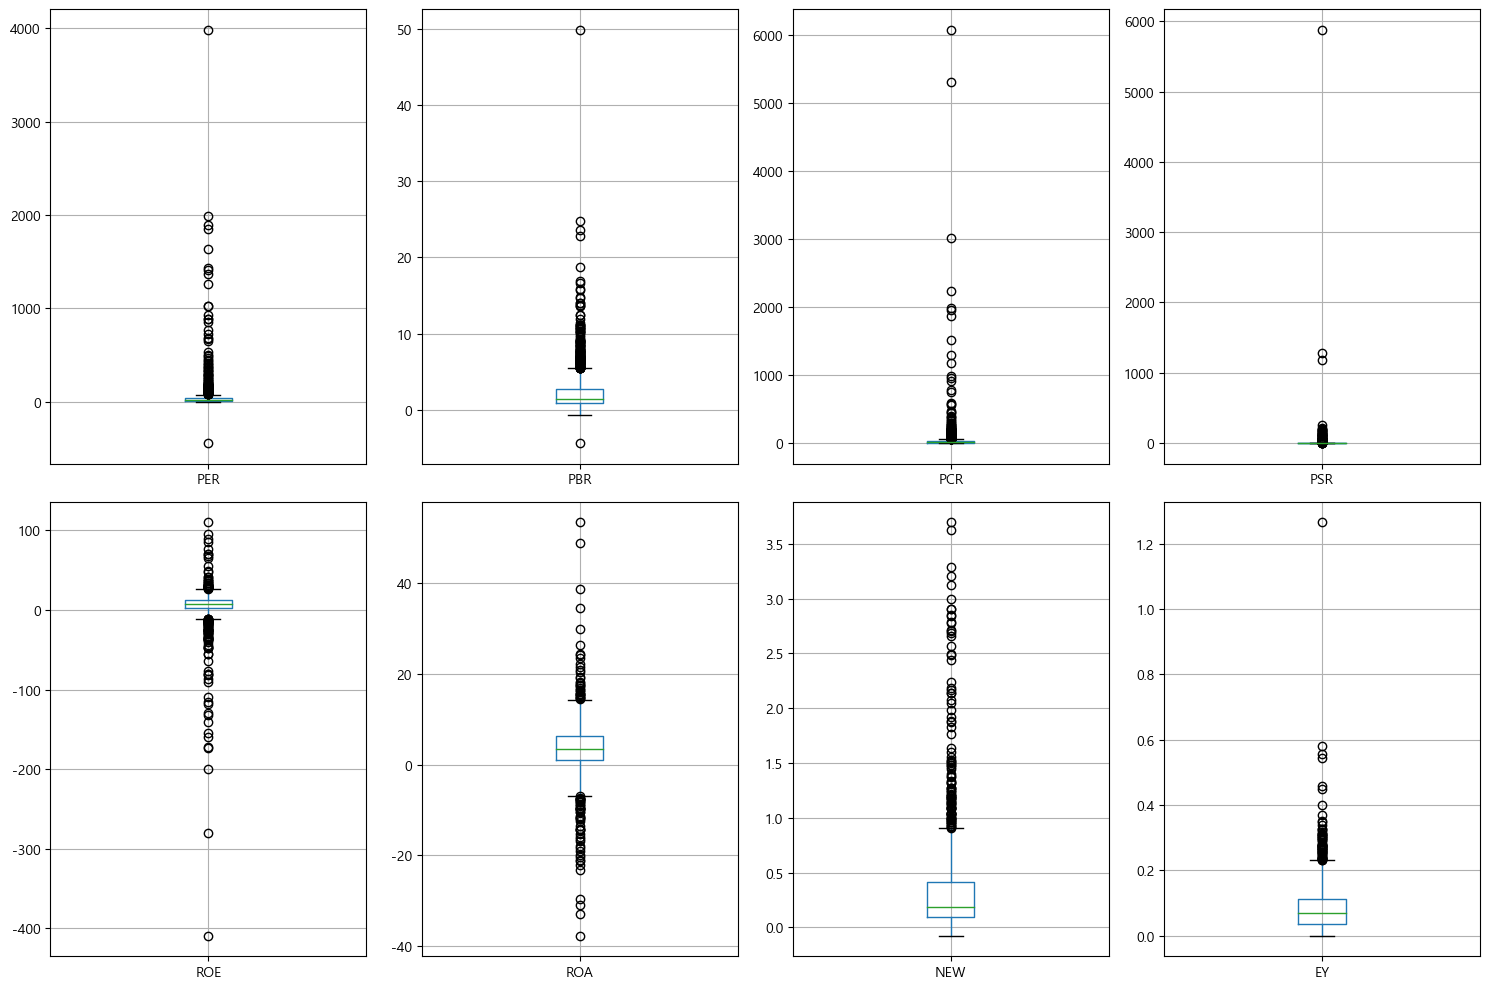

In [740]:
## 윈저라이징 전 박스플롯

import matplotlib.pyplot as plt

kospi_num = kospi[["PER", "PBR", "PCR", "PSR", "ROE", "ROA", "NEW", "EY"]]
kospi_num_col = kospi[["PER", "PBR", "PCR", "PSR", "ROE", "ROA", "NEW", "EY"]].columns

# 행과 열의 수 계산
n = len(kospi_num_col)
ncols = 4
nrows = n // ncols + (n % ncols > 0)

# 서브플롯 생성
fig, axes = plt.subplots(nrows, ncols, figsize=(15, nrows*5))

for i, var in enumerate(kospi_num_col):
    r, c = i // ncols, i % ncols
    ax = axes[r, c]
    kospi_num.boxplot(column=var, ax=ax)

# 빈 서브플롯 제거
if n % ncols > 0:
    for j in range(n % ncols, ncols):
        fig.delaxes(axes[nrows-1, j])

plt.tight_layout()  #  plt.tight_layout() 함수는 서브플롯 간의 간격을 적절하게 조절합니다.
plt.show()

In [741]:
kospi_f = kospi[["PER", "PBR", "PCR", "PSR", "ROE", "ROA", "NEW", "EY"]]

In [742]:
# 윈저라이징으로 양쪽 이상치 처리
# 이상치 확인
kospi_f['PER']

q2 = np.percentile(kospi_f['PER'], 2)
q98 = np.percentile(kospi_f['PER'], 98)

outliers = kospi_f['PER'][(kospi_f['PER'] < q2) | (kospi_f['PER'] > q98)]

print("하위 2%:", q2)
print("상위 2%:", q98)
print("이상치 :", outliers)

하위 2%: 0.0
상위 2%: 407.1212
이상치 : 67      1406.015
69       645.450
144     1895.040
255     1020.735
256      433.360
473     1847.540
645     -445.920
655      887.825
660      720.000
673      849.515
687      487.575
688      763.135
698     1365.720
724      884.075
843      408.265
845     3986.830
1187    1025.100
1188    1992.565
1189     927.920
1190     686.050
1191     465.805
1192     672.145
1196    1429.075
1198     445.170
1200    1262.105
1223     501.485
1225     528.260
1229    1632.275
Name: PER, dtype: float64


In [743]:
# 윈저라이징 함수 만들기
def windsorize(data, lower_percentile=0.02, upper_percentile=0.98):
    if isinstance(data, pd.Series):
        data = pd.DataFrame(data)
    numeric_df = data.select_dtypes(include=np.number)
    lower_bound = np.percentile(numeric_df, lower_percentile * 100)
    upper_bound = np.percentile(numeric_df, upper_percentile * 100)
    windsorized_data = np.where(numeric_df < lower_bound, lower_bound, numeric_df)
    windsorized_data = np.where(windsorized_data > upper_bound, upper_bound, windsorized_data)
    return windsorized_data

In [744]:
for i in range(0, 7, 1):
    kospi_f[kospi_f.columns[i]] = windsorize(kospi_f[kospi_f.columns[i]])

In [745]:
# 윈저라이징으로 양쪽 이상치 처리
# 이상치 처리 확인 후 확인
kospi_f['PER']

q2 = np.percentile(kospi_f['PER'], 2)
q98 = np.percentile(kospi_f['PER'], 98)

outliers = kospi_f['PER'][(kospi_f['PER'] < q2) | (kospi_f['PER'] > q98)]

print("하위 2%:", q2)
print("상위 2%:", q98)
print("이상치 :", outliers)

하위 2%: 0.0
상위 2%: 406.846688
이상치 : 67      407.1212
69      407.1212
144     407.1212
255     407.1212
256     407.1212
473     407.1212
655     407.1212
660     407.1212
673     407.1212
687     407.1212
688     407.1212
698     407.1212
724     407.1212
843     407.1212
845     407.1212
1187    407.1212
1188    407.1212
1189    407.1212
1190    407.1212
1191    407.1212
1192    407.1212
1196    407.1212
1198    407.1212
1200    407.1212
1223    407.1212
1225    407.1212
1229    407.1212
Name: PER, dtype: float64


In [746]:
kospi_f

,PER,PBR,PCR,PSR,ROE,ROA,NEW,EY
0,0.000,3.635,5.695,0.475,-40.8584,-7.819136,0.446111,0.153846
1,4.105,2.150,3.480,0.785,30.1272,12.870986,0.165039,0.195695
2,8.260,2.145,2.945,0.940,29.6500,8.952679,0.166677,0.246305
3,10.395,1.910,4.245,1.140,27.6200,11.084563,0.207305,0.269542
4,7.210,1.360,3.755,1.025,17.1200,8.141211,0.212452,0.268097
...,...,...,...,...,...,...,...,...
1334,15.085,4.550,16.070,2.385,30.1272,11.346144,0.074404,0.034554
1335,9.525,3.070,8.875,2.355,19.1100,5.460103,0.138510,0.069686
1336,10.240,1.375,3.240,0.200,25.1000,5.958373,0.254025,0.103734
1337,9.165,4.770,12.370,0.555,30.1272,15.414540,0.122155,0.149925


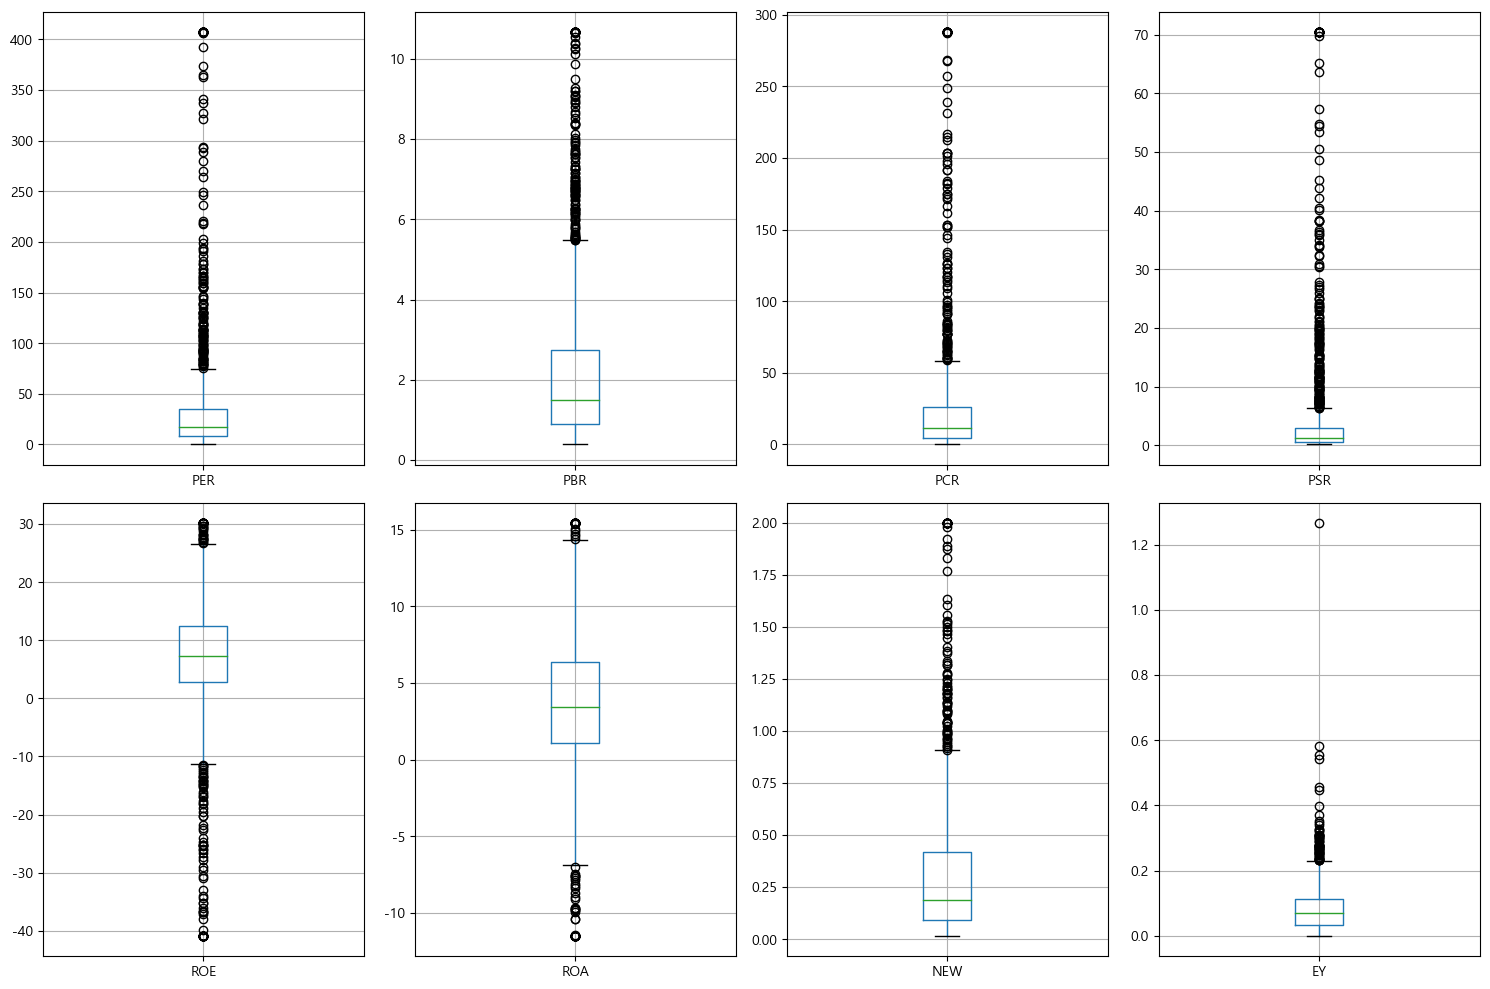

In [747]:
## 윈저라이징 후 박스플롯

import matplotlib.pyplot as plt

kospi_num = kospi_f
kospi_num_col = kospi_f.columns

# 행과 열의 수 계산
n = len(kospi_num_col)
ncols = 4
nrows = n // ncols + (n % ncols > 0)

# 서브플롯 생성
fig, axes = plt.subplots(nrows, ncols, figsize=(15, nrows*5))

for i, var in enumerate(kospi_num_col):
    r, c = i // ncols, i % ncols
    ax = axes[r, c]
    kospi_num.boxplot(column=var, ax=ax)

# 빈 서브플롯 제거
if n % ncols > 0:
    for j in range(n % ncols, ncols):
        fig.delaxes(axes[nrows-1, j])

plt.tight_layout()  #  plt.tight_layout() 함수는 서브플롯 간의 간격을 적절하게 조절합니다.
plt.show()

In [748]:
kospi_f

,PER,PBR,PCR,PSR,ROE,ROA,NEW,EY
0,0.000,3.635,5.695,0.475,-40.8584,-7.819136,0.446111,0.153846
1,4.105,2.150,3.480,0.785,30.1272,12.870986,0.165039,0.195695
2,8.260,2.145,2.945,0.940,29.6500,8.952679,0.166677,0.246305
3,10.395,1.910,4.245,1.140,27.6200,11.084563,0.207305,0.269542
4,7.210,1.360,3.755,1.025,17.1200,8.141211,0.212452,0.268097
...,...,...,...,...,...,...,...,...
1334,15.085,4.550,16.070,2.385,30.1272,11.346144,0.074404,0.034554
1335,9.525,3.070,8.875,2.355,19.1100,5.460103,0.138510,0.069686
1336,10.240,1.375,3.240,0.200,25.1000,5.958373,0.254025,0.103734
1337,9.165,4.770,12.370,0.555,30.1272,15.414540,0.122155,0.149925


In [749]:
# kospi[["PER", "PBR", "PCR", "PSR", "ROE", "ROA", "NEW", "EY"]] = 윈저라이징 전 데이터
# kospi_f = 윈저라이징 후 데이터

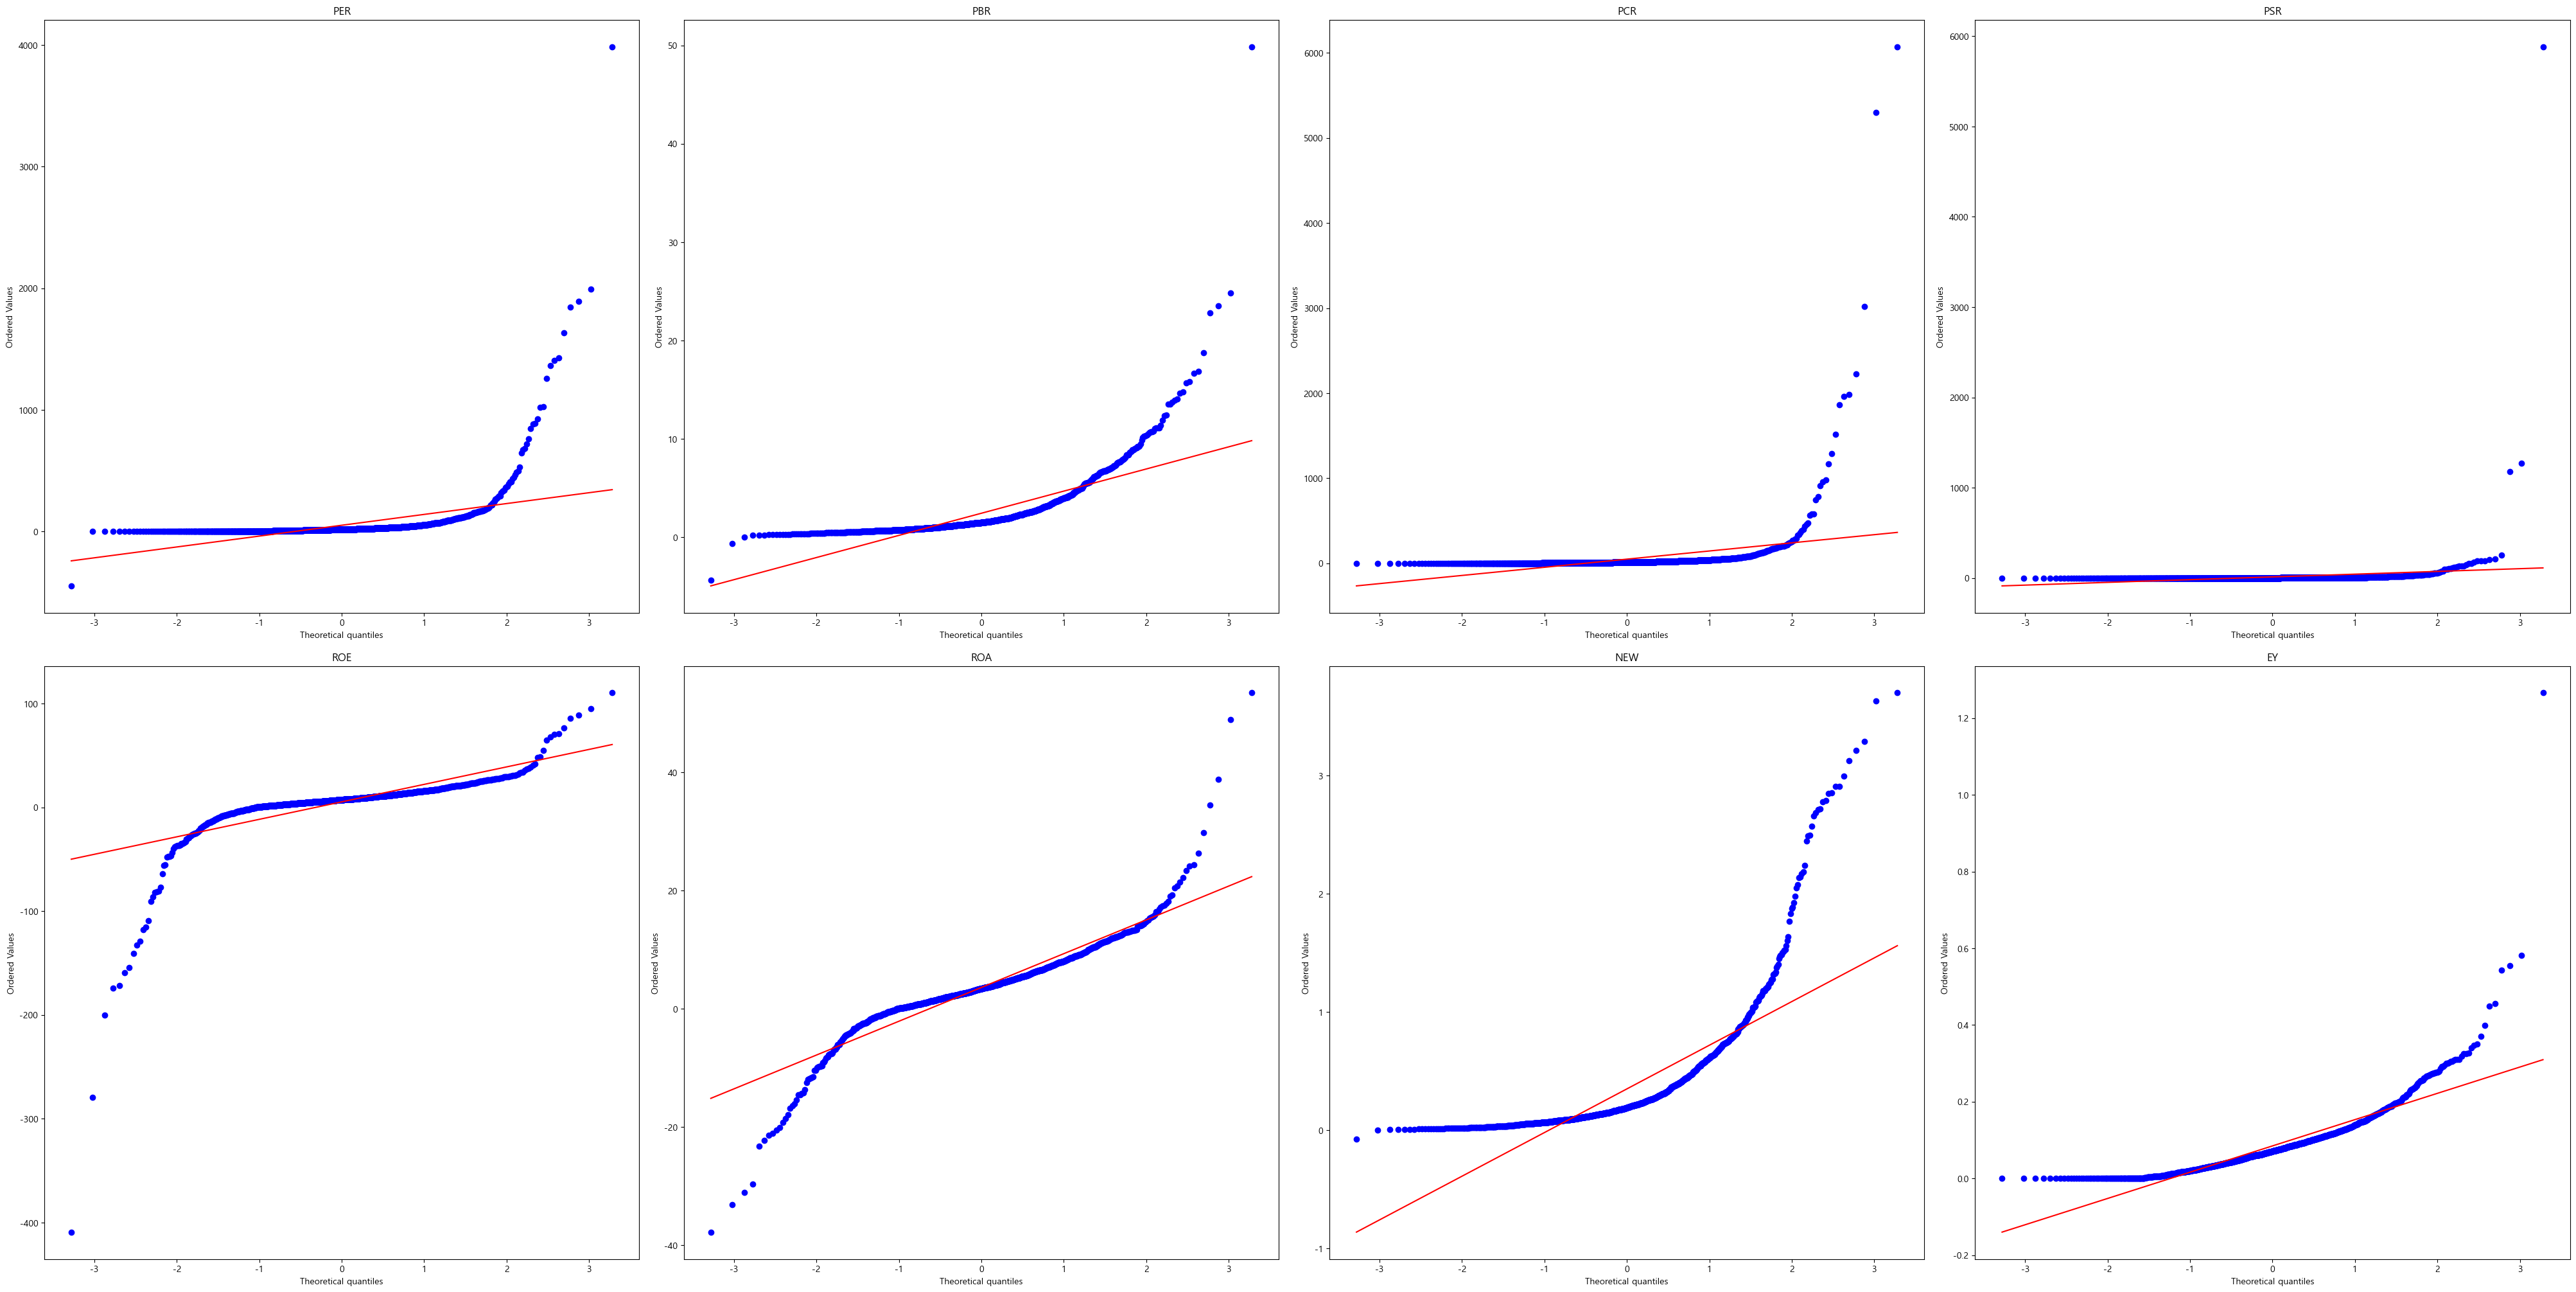

In [750]:
# 윈저라이징 전 qqplot

from scipy import stats

def qqplot(df,ncols,nrows):
    plt.rcParams['axes.unicode_minus'] = False
    plt.rcParams["font.family"] = 'Malgun Gothic'
   
    fig, axs = plt.subplots(nrows, ncols, constrained_layout=True)
    fig.set_size_inches((40, 20))

    for ax, i in zip(axs.ravel(), df):
            stats.probplot(df[i], dist=stats.norm, plot=ax)
            ax.set_title(str(i))

    plt.show()

qqplot(kospi[["PER", "PBR", "PCR", "PSR", "ROE", "ROA", "NEW", "EY"]],4,2)

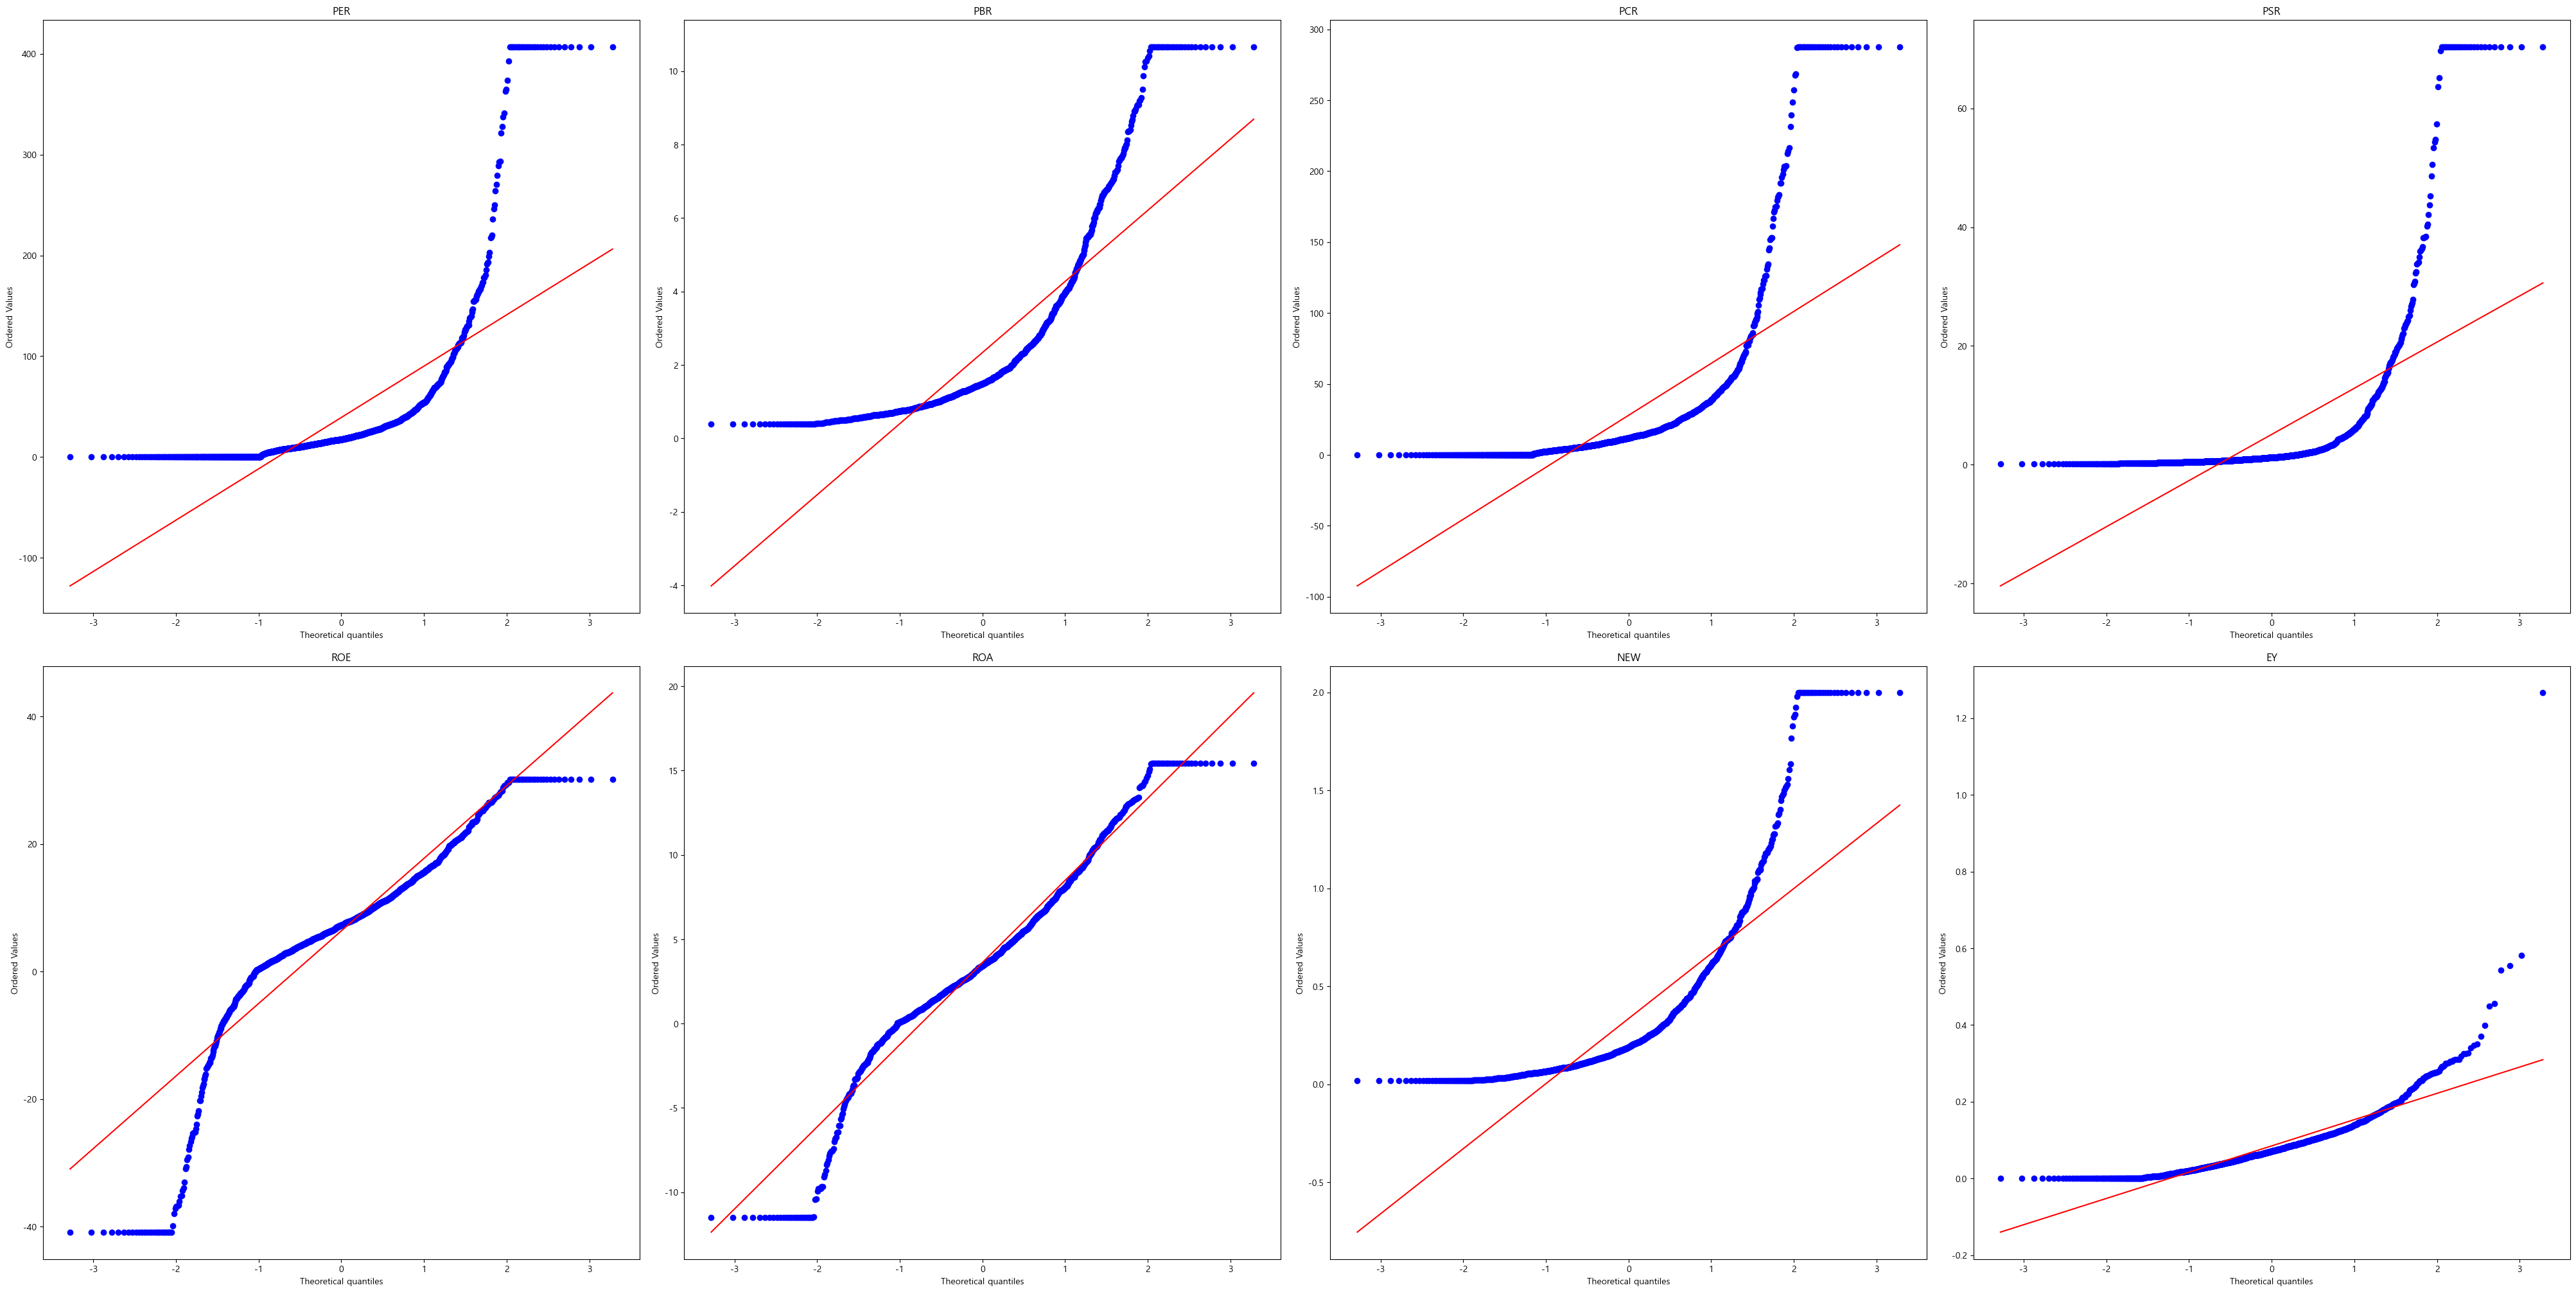

In [751]:
# 윈저라이징 후 qqplot

from scipy import stats

def qqplot(df,ncols,nrows):
    plt.rcParams['axes.unicode_minus'] = False
    plt.rcParams["font.family"] = 'Malgun Gothic'
   
    fig, axs = plt.subplots(nrows, ncols, constrained_layout=True)
    fig.set_size_inches((40, 20))

    for ax, i in zip(axs.ravel(), df):
            stats.probplot(df[i], dist=stats.norm, plot=ax)
            ax.set_title(str(i))

    plt.show()

qqplot(kospi_f, 4, 2)

In [752]:
# kospi[["PER", "PBR", "PCR", "PSR", "ROE", "ROA", "NEW", "EY"]] = 윈저라이징 전 데이터
# kospi_f = 윈저라이징 후 데이터

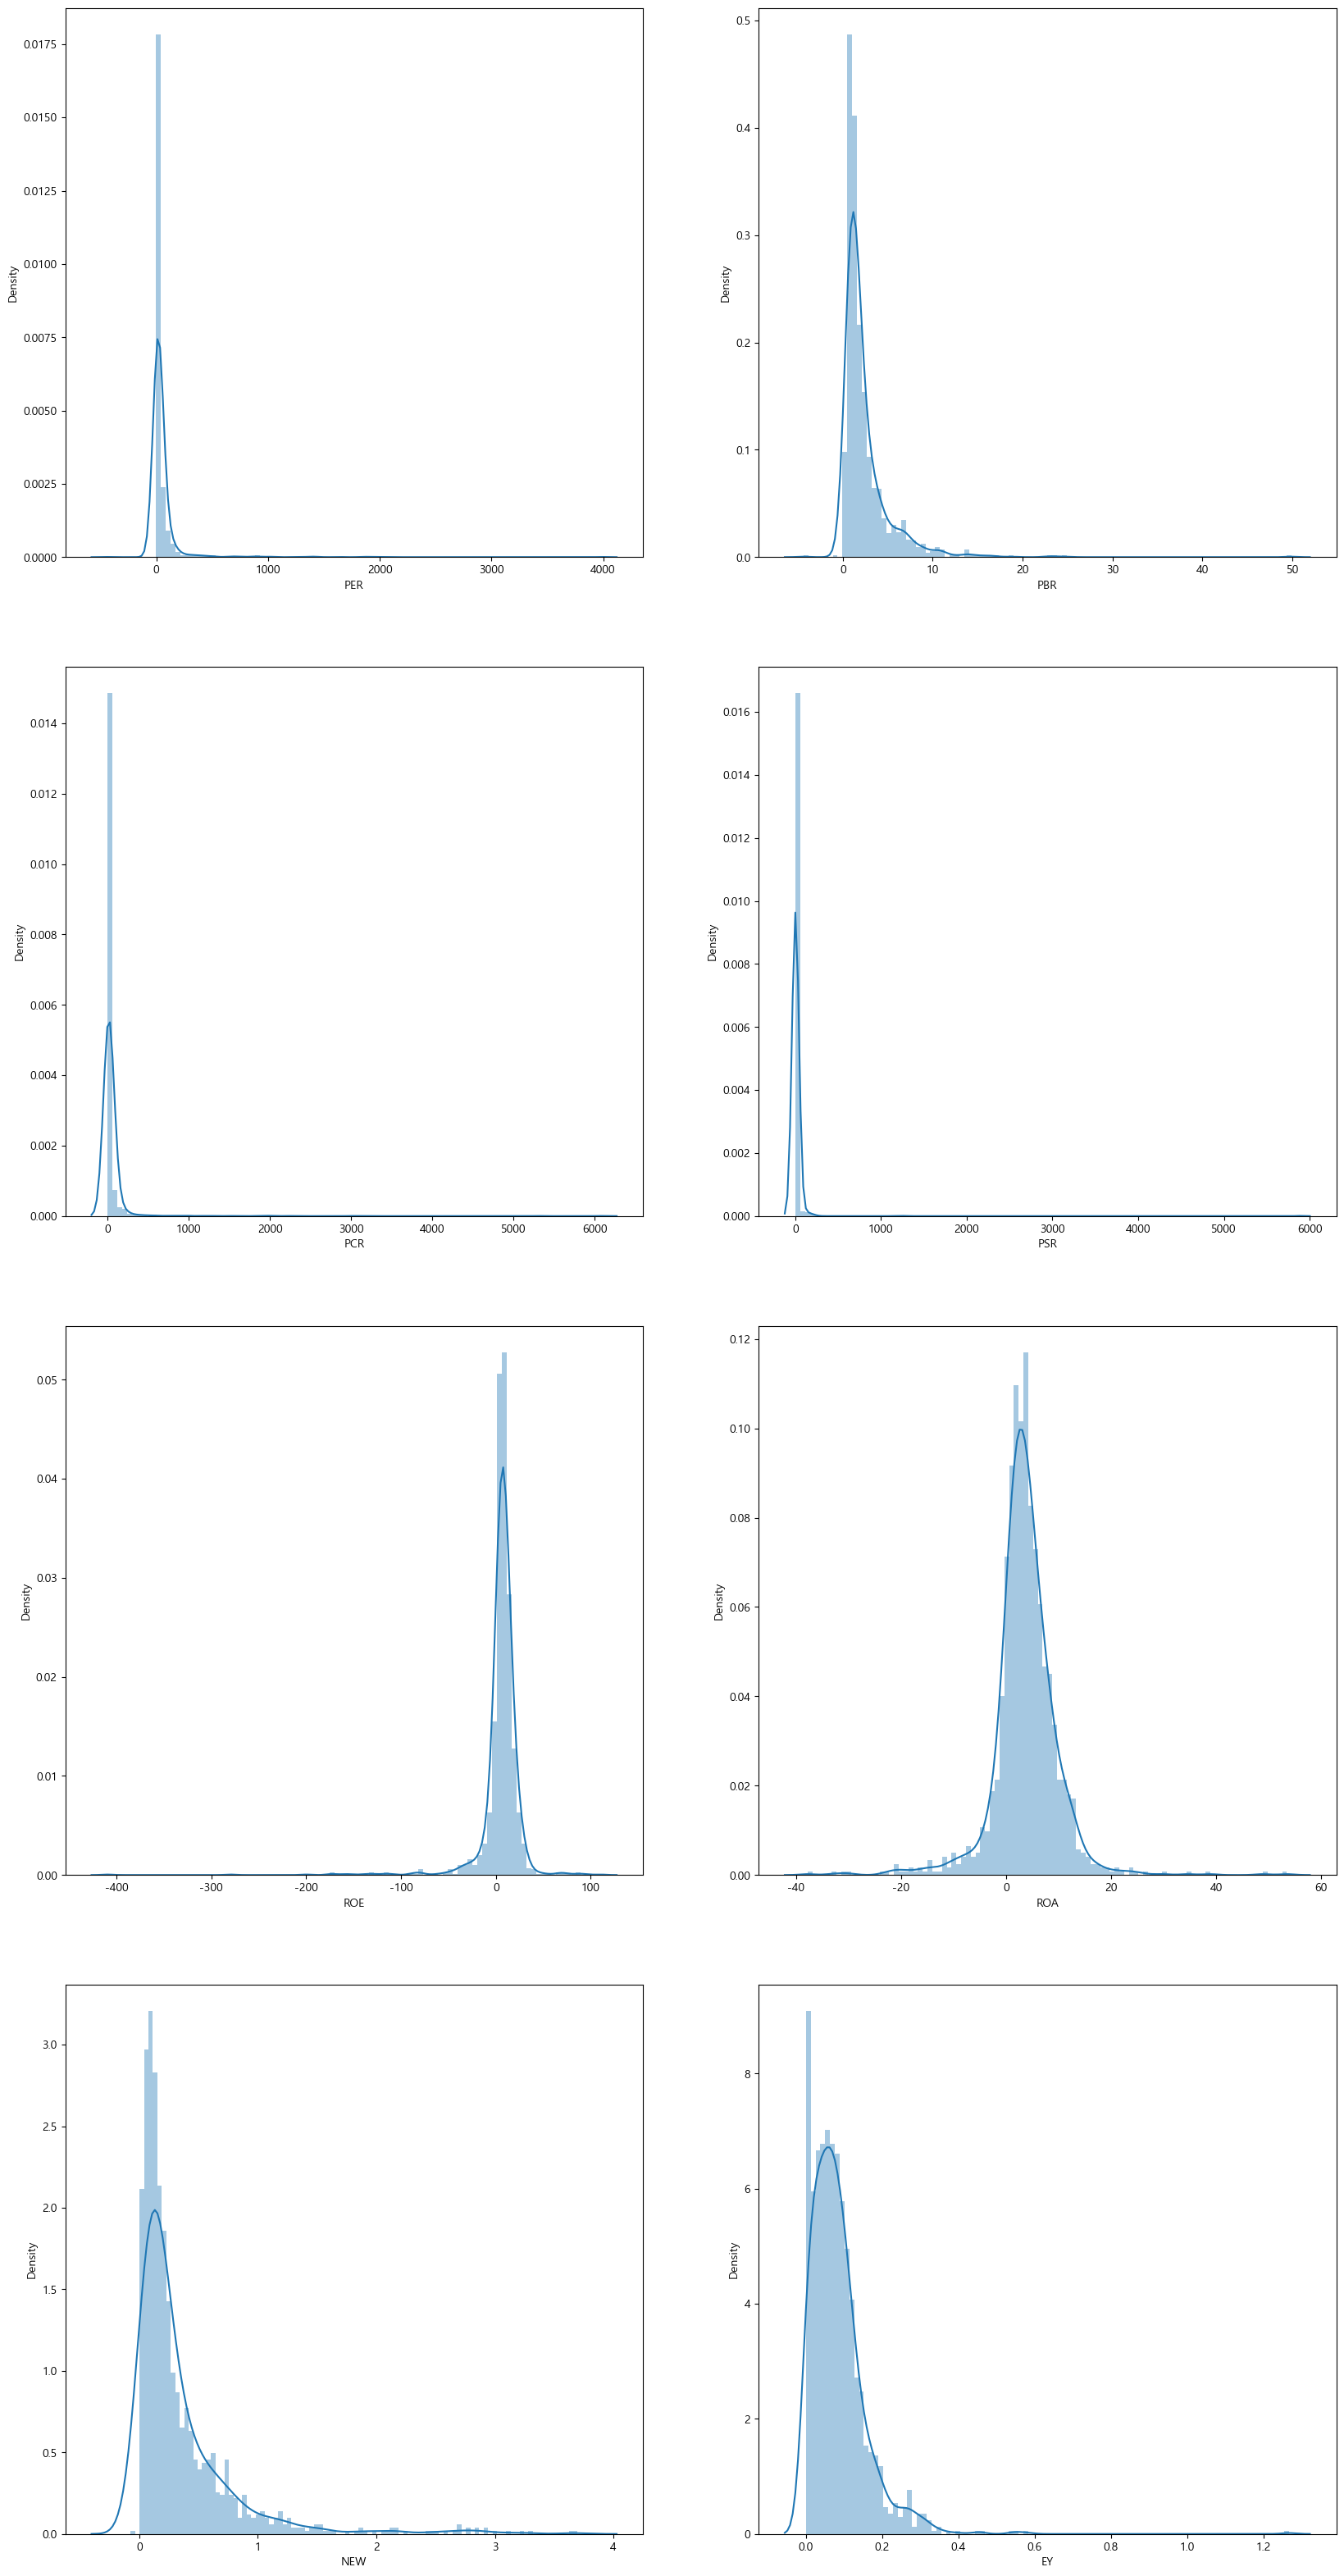

In [753]:
# 윈저라이징 전 distplot

col_n = 2
row_n = 4

fig, ax = plt.subplots(ncols=col_n, nrows=row_n, figsize=(20,row_n*10))

for i,col in enumerate(kospi[["PER", "PBR", "PCR", "PSR", "ROE", "ROA", "NEW", "EY"]].columns):
    sns.distplot(kospi[["PER", "PBR", "PCR", "PSR", "ROE", "ROA", "NEW", "EY"]][col], bins=100, ax=ax[int(i/col_n),int(i%col_n)])

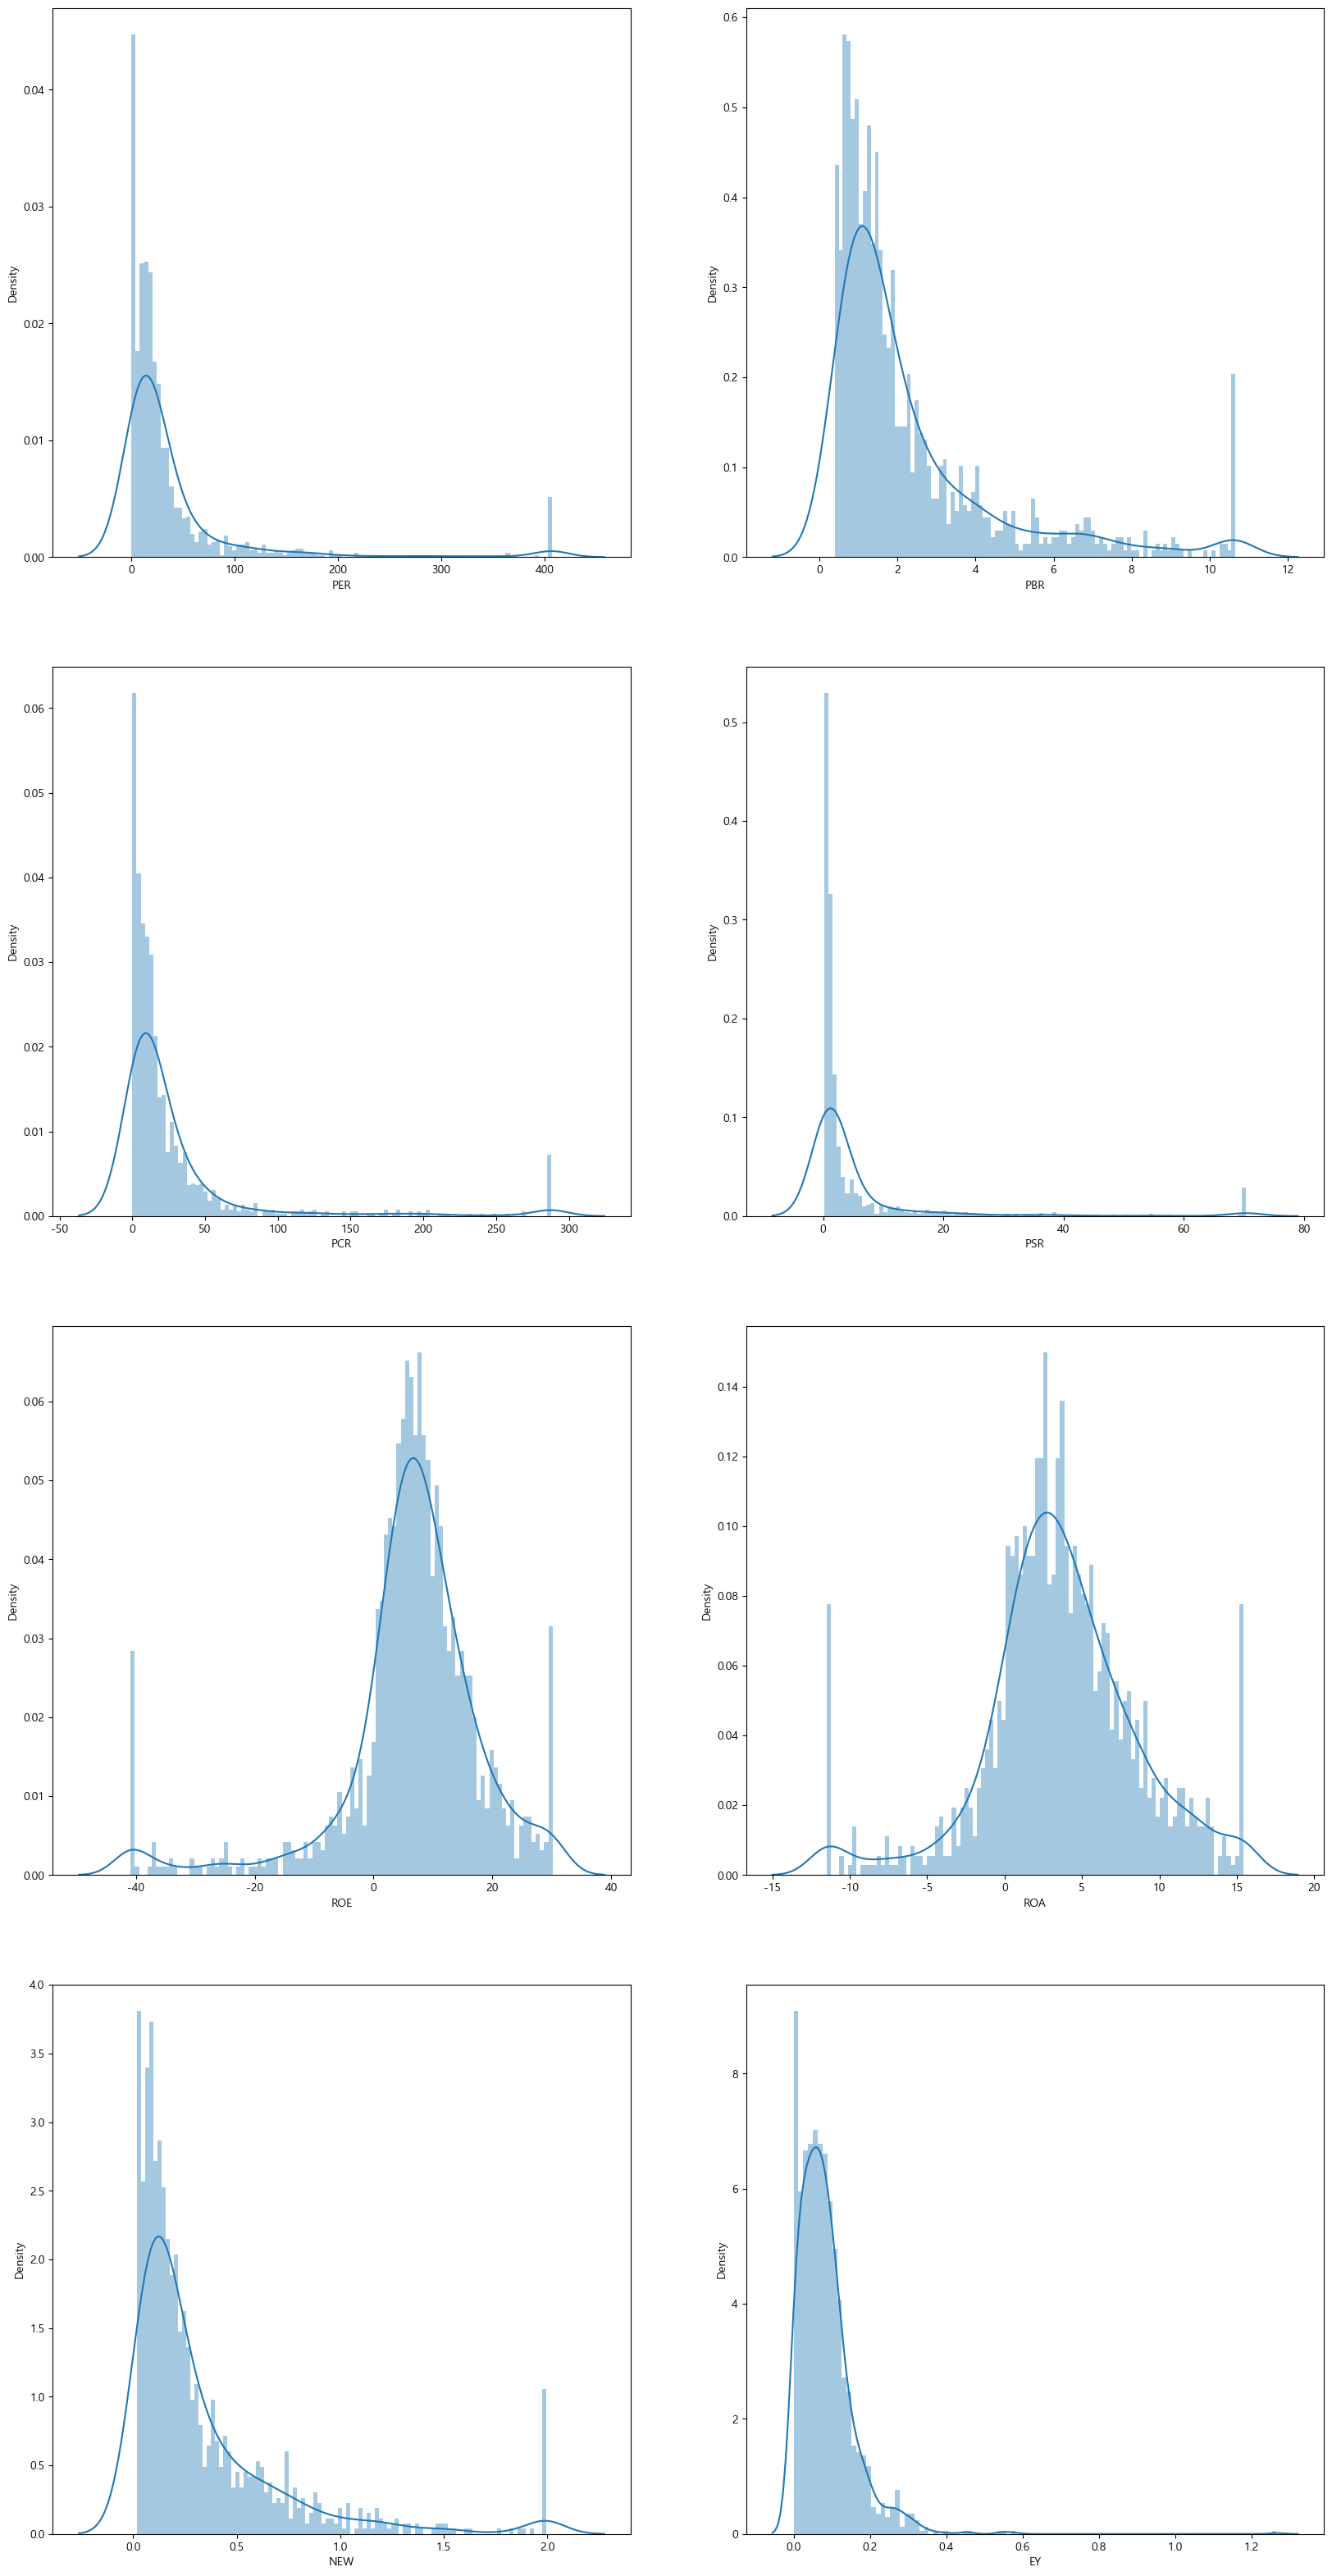

In [754]:
# 윈저라이징 후 distplot


col_n = 2
row_n = 4

fig, ax = plt.subplots(ncols=col_n, nrows=row_n, figsize=(20,row_n*10))

for i,col in enumerate(kospi_f.columns):
    sns.distplot(kospi_f[col], bins=100, ax=ax[int(i/col_n),int(i%col_n)])



In [755]:
kospi_f

,PER,PBR,PCR,PSR,ROE,ROA,NEW,EY
0,0.000,3.635,5.695,0.475,-40.8584,-7.819136,0.446111,0.153846
1,4.105,2.150,3.480,0.785,30.1272,12.870986,0.165039,0.195695
2,8.260,2.145,2.945,0.940,29.6500,8.952679,0.166677,0.246305
3,10.395,1.910,4.245,1.140,27.6200,11.084563,0.207305,0.269542
4,7.210,1.360,3.755,1.025,17.1200,8.141211,0.212452,0.268097
...,...,...,...,...,...,...,...,...
1334,15.085,4.550,16.070,2.385,30.1272,11.346144,0.074404,0.034554
1335,9.525,3.070,8.875,2.355,19.1100,5.460103,0.138510,0.069686
1336,10.240,1.375,3.240,0.200,25.1000,5.958373,0.254025,0.103734
1337,9.165,4.770,12.370,0.555,30.1272,15.414540,0.122155,0.149925


In [756]:
kospi_f_col = kospi_f.columns

In [757]:
import numpy as np
from sklearn.preprocessing import StandardScaler

# standard 스케일링
scaler = StandardScaler()
kospi_f[kospi_f_col] = scaler.fit_transform(kospi_f[kospi_f_col])

print(kospi_f.head())

        PER       PBR       PCR       PSR       ROE       ROA       NEW   
0 -0.549544  0.578752 -0.429689 -0.382207 -3.859322 -2.310075  0.283950  \
1 -0.492059 -0.083028 -0.472675 -0.356553  1.942745  1.868326 -0.431955   
2 -0.433873 -0.085256 -0.483058 -0.343725  1.903741  1.077018 -0.427782   
3 -0.403975 -0.189982 -0.457829 -0.327174  1.737817  1.507555 -0.324302   
4 -0.448577 -0.435086 -0.467338 -0.336691  0.879591  0.913141 -0.311192   

         EY  
0  0.884955  
1  1.421180  
2  2.069677  
3  2.367415  
4  2.348896  


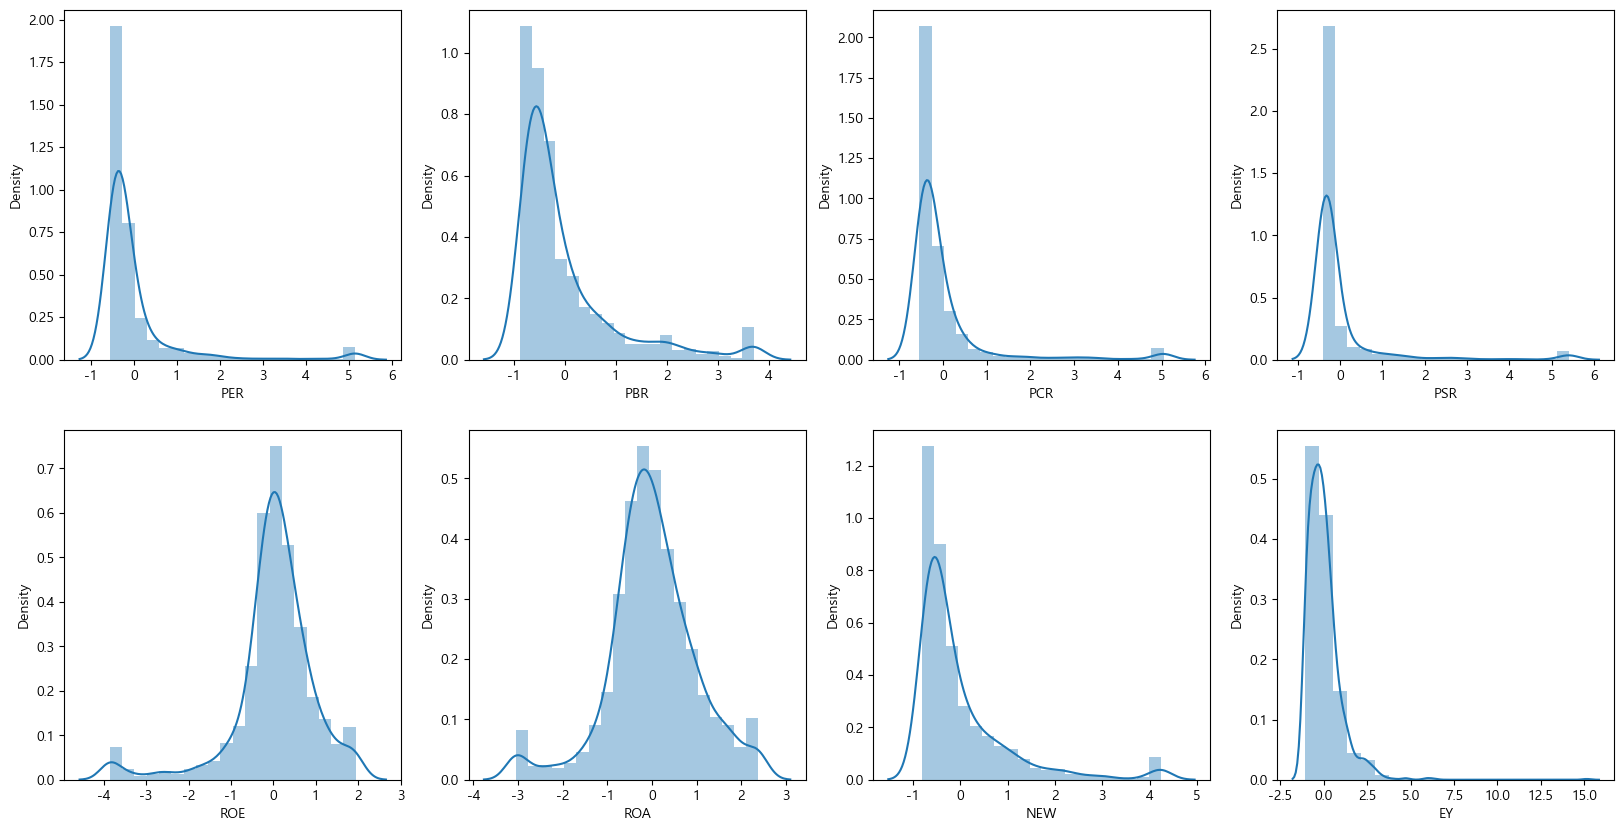

In [758]:
# 윈저라이징 후 distplot

col_n = 4
row_n = 2

fig, ax = plt.subplots(ncols=col_n, nrows=row_n, figsize=(20,row_n*5))

for i,col in enumerate(kospi_f.columns):
    sns.distplot(kospi_f[col], bins=20, ax=ax[int(i/col_n),int(i%col_n)])

In [759]:
kospi[['PER', "PBR", "PCR", "PSR", "ROA", "NEW", "EY", "ROE"]] = kospi_f[['PER', "PBR", "PCR", "PSR", "ROA", "NEW", "EY", "ROE"]]

In [772]:
kospi.to_csv("kospi_scaled.csv")

In [760]:
kospi_f

,PER,PBR,PCR,PSR,ROE,ROA,NEW,EY
0,-0.549544,0.578752,-0.429689,-0.382207,-3.859322,-2.310075,0.283950,0.884955
1,-0.492059,-0.083028,-0.472675,-0.356553,1.942745,1.868326,-0.431955,1.421180
2,-0.433873,-0.085256,-0.483058,-0.343725,1.903741,1.077018,-0.427782,2.069677
3,-0.403975,-0.189982,-0.457829,-0.327174,1.737817,1.507555,-0.324302,2.367415
4,-0.448577,-0.435086,-0.467338,-0.336691,0.879591,0.913141,-0.311192,2.348896
...,...,...,...,...,...,...,...,...
1334,-0.338297,0.986516,-0.228343,-0.224142,1.942745,1.560382,-0.662807,-0.643585
1335,-0.416158,0.326964,-0.367975,-0.226624,1.042245,0.371687,-0.499527,-0.193421
1336,-0.406145,-0.428401,-0.477333,-0.404966,1.531843,0.472314,-0.205304,0.242851
1337,-0.421200,1.084558,-0.300148,-0.375587,1.942745,2.382001,-0.541182,0.834712


In [761]:
kospi_PER = kospi[["PER"]]
kospi_f_PER = kospi_f[["PER"]]

In [762]:
kospi_PER = kospi_PER.loc[kospi_PER.values != 0]
kospi_PER

,PER
0,-0.549544
1,-0.492059
2,-0.433873
3,-0.403975
4,-0.448577
...,...
1334,-0.338297
1335,-0.416158
1336,-0.406145
1337,-0.421200


In [763]:
kospi_f_PER

,PER
0,-0.549544
1,-0.492059
2,-0.433873
3,-0.403975
4,-0.448577
...,...
1334,-0.338297
1335,-0.416158
1336,-0.406145
1337,-0.421200


In [764]:
(kospi_PER.values == 0).sum()

0

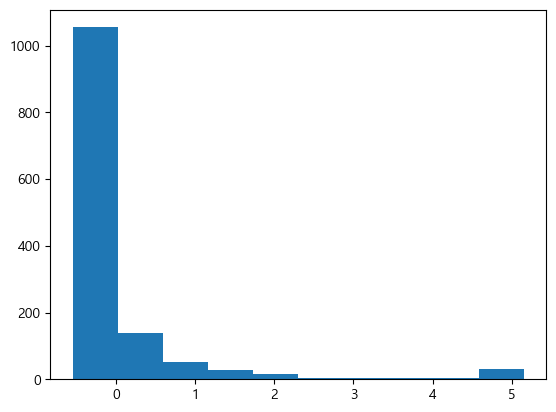

In [765]:
plt.hist(kospi_PER)
plt.show()

In [766]:
### PER == 0 제거

sample_kospi = kospi.loc[~(kospi["PER"] == 0)]
sample_kospi

,회사명,종목코드,회계년도,종가,ROE,상장주식수,시가총액,수익률,PER,PBR,PCR,PSR,ROA,NEW,EY,수정종가
0,DB하이텍,990,2014,4615.0,-3.859322,44367832.0,2.047575e+11,0.310559,-0.549544,0.578752,-0.429689,-0.382207,-2.310075,0.283950,0.884955,6640.0
1,DB하이텍,990,2015,14300.0,1.942745,44367832.0,6.344600e+11,-1.144578,-0.492059,-0.083028,-0.472675,-0.356553,1.868326,-0.431955,1.421180,5880.0
2,DB하이텍,990,2016,15900.0,1.903741,44367832.0,7.054485e+11,20.782313,-0.433873,-0.085256,-0.483058,-0.343725,1.077018,-0.427782,2.069677,18100.0
3,DB하이텍,990,2017,12000.0,1.737817,44367832.0,5.324140e+11,1.243094,-0.403975,-0.189982,-0.457829,-0.327174,1.507555,-0.324302,2.367415,20350.0
4,DB하이텍,990,2018,10850.0,0.879591,44398588.0,4.817247e+11,-3.046683,-0.448577,-0.435086,-0.467338,-0.336691,0.913141,-0.311192,2.348896,14150.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1334,효성첨단소재,298050,2021,596000.0,1.942745,4479948.0,2.670049e+12,51.001642,-0.338297,0.986516,-0.228343,-0.224142,1.560382,-0.662807,-0.643585,371500.0
1335,효성첨단소재,298050,2022,333500.0,1.042245,4479948.0,1.494063e+12,4.051144,-0.416158,0.326964,-0.367975,-0.226624,0.371687,-0.499527,-0.193421,522000.0
1336,효성티앤씨,298020,2020,211000.0,1.531843,4327682.0,9.131409e+11,-4.189944,-0.406145,-0.428401,-0.477333,-0.404966,0.472314,-0.205304,0.242851,104000.0
1337,효성티앤씨,298020,2021,521000.0,1.942745,4327682.0,2.254722e+12,43.653846,-0.421200,1.084558,-0.300148,-0.375587,2.382001,-0.541182,0.834712,558000.0


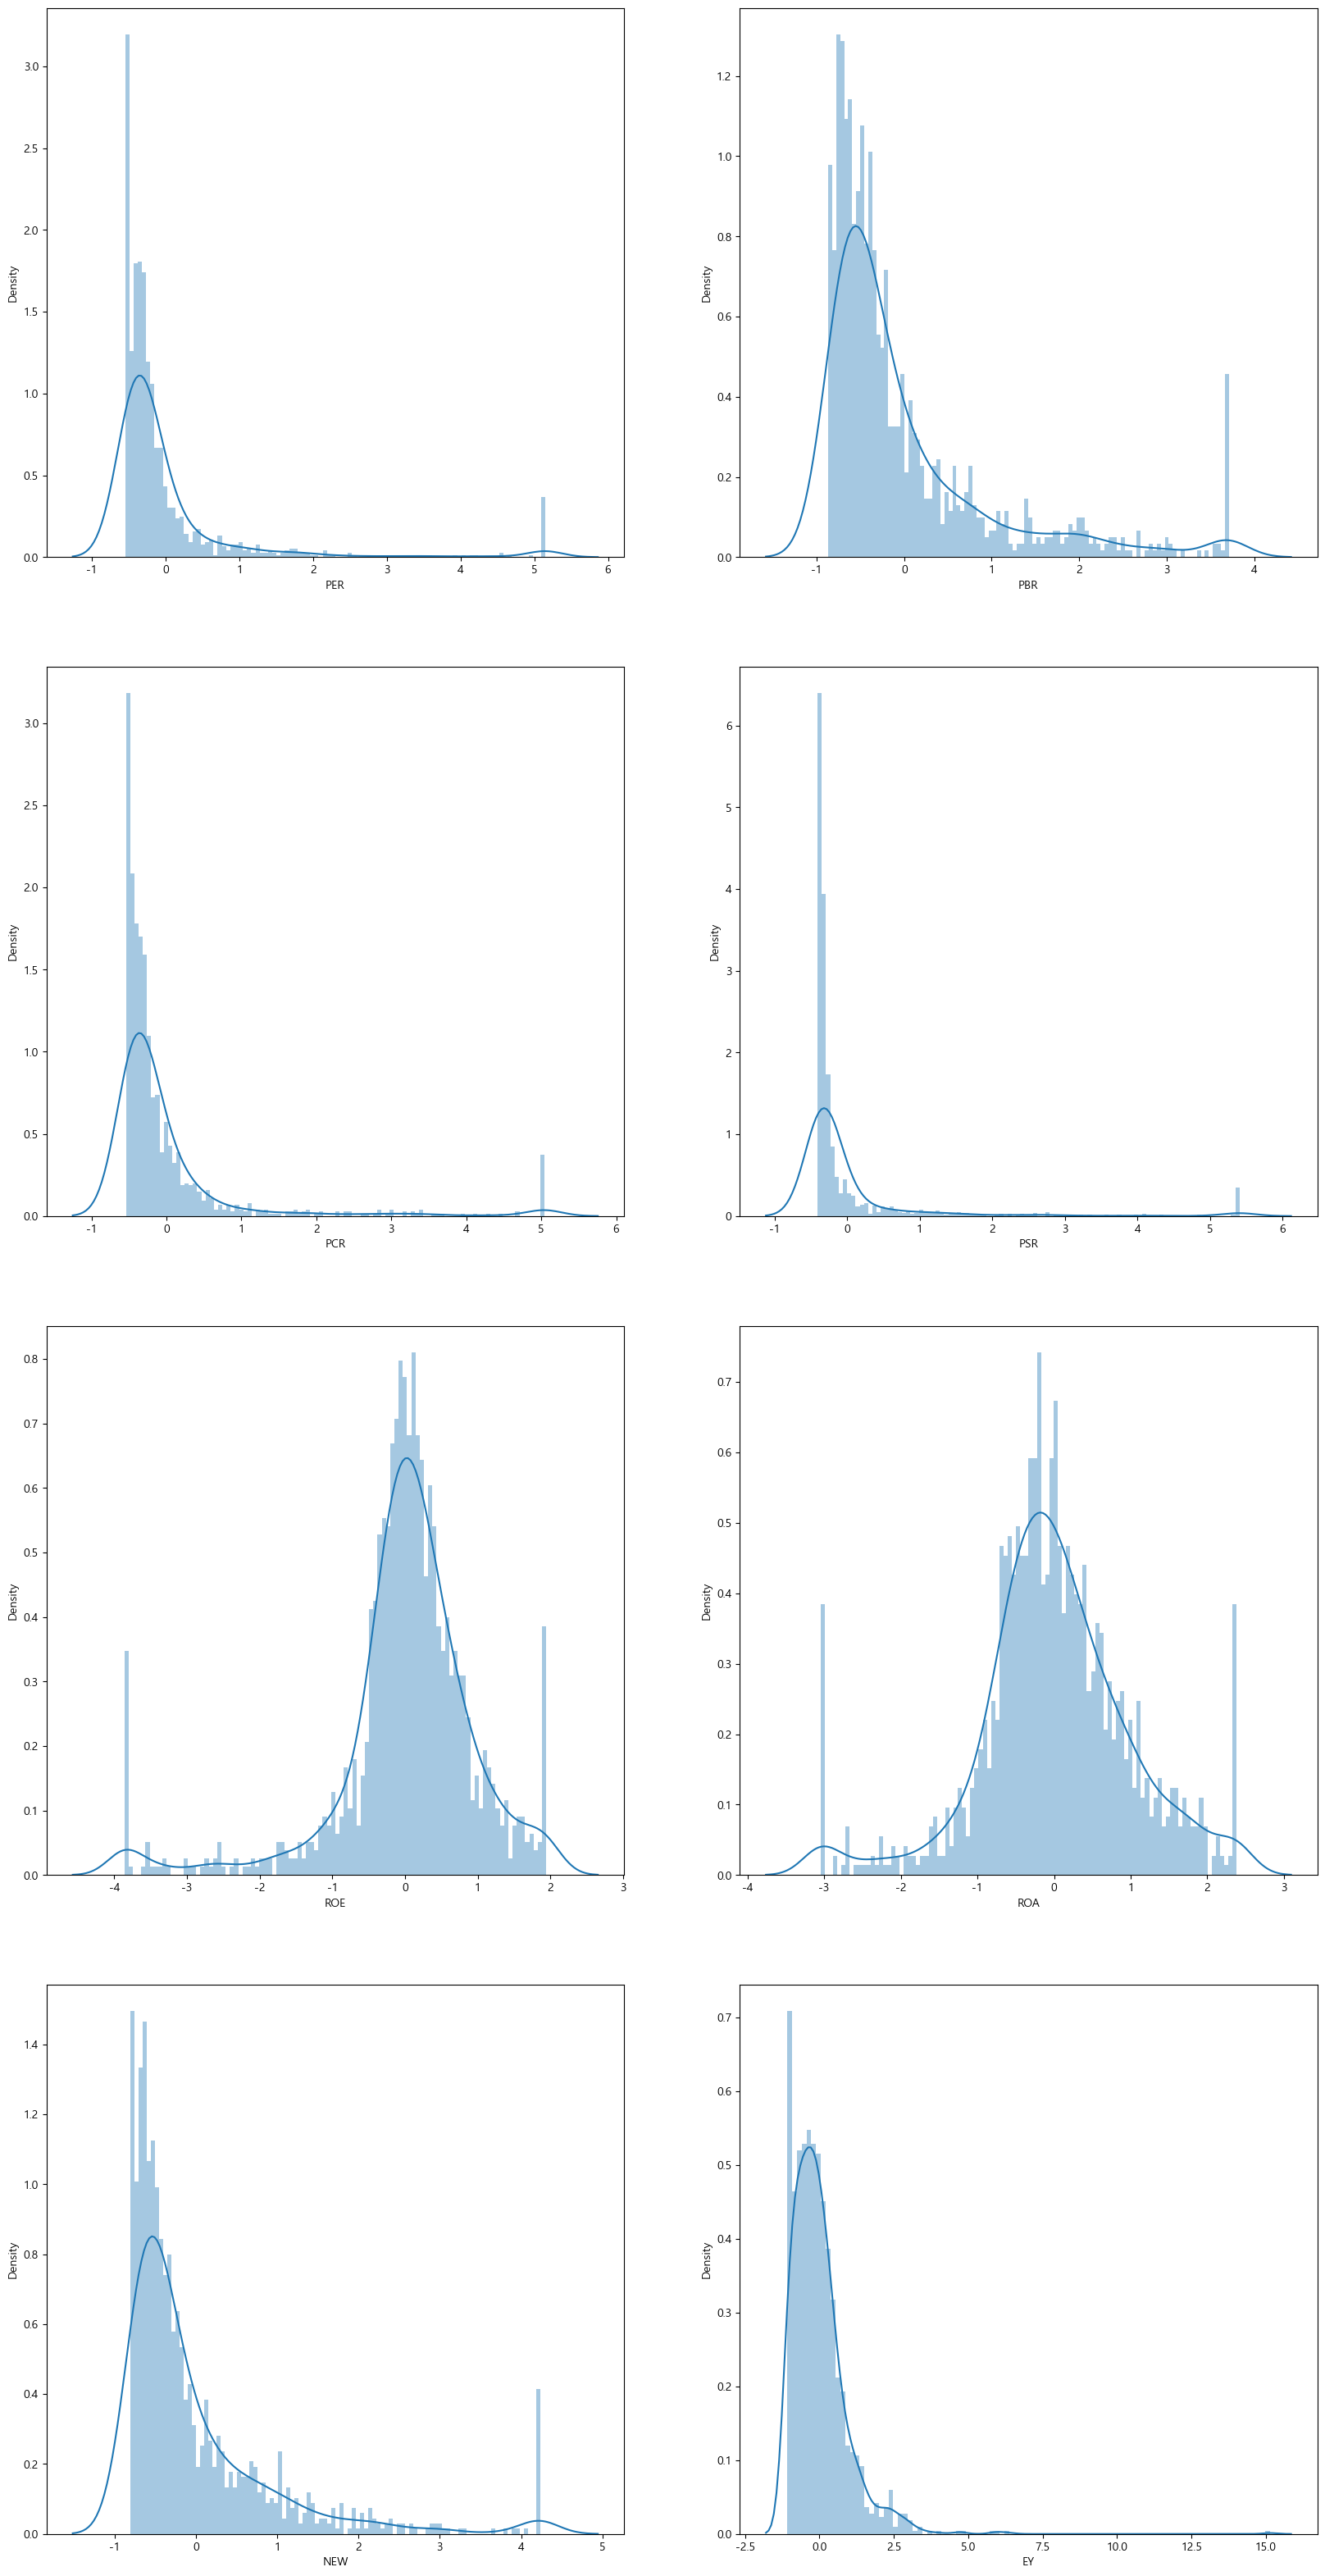

In [767]:
## 윈저라이징 전 distplot (PER == 0 제거)

col_n = 2
row_n = 4

fig, ax = plt.subplots(ncols=col_n, nrows=row_n, figsize=(20,row_n*10))

for i,col in enumerate(sample_kospi[["PER", "PBR", "PCR", "PSR", "ROE", "ROA", "NEW", "EY"]].columns):
    sns.distplot(sample_kospi[["PER", "PBR", "PCR", "PSR", "ROE", "ROA", "NEW", "EY"]][col], bins=100, ax=ax[int(i/col_n),int(i%col_n)])

In [768]:
sample_kospi_f = sample_kospi[["PER", "PBR", "PCR", "PSR", "ROE", "ROA", "NEW", "EY"]]

In [769]:
### 윈저라이징 ###
for i in range(0, 7, 1):
    sample_kospi_f[sample_kospi_f.columns[i]] = windsorize(sample_kospi_f[sample_kospi_f.columns[i]])

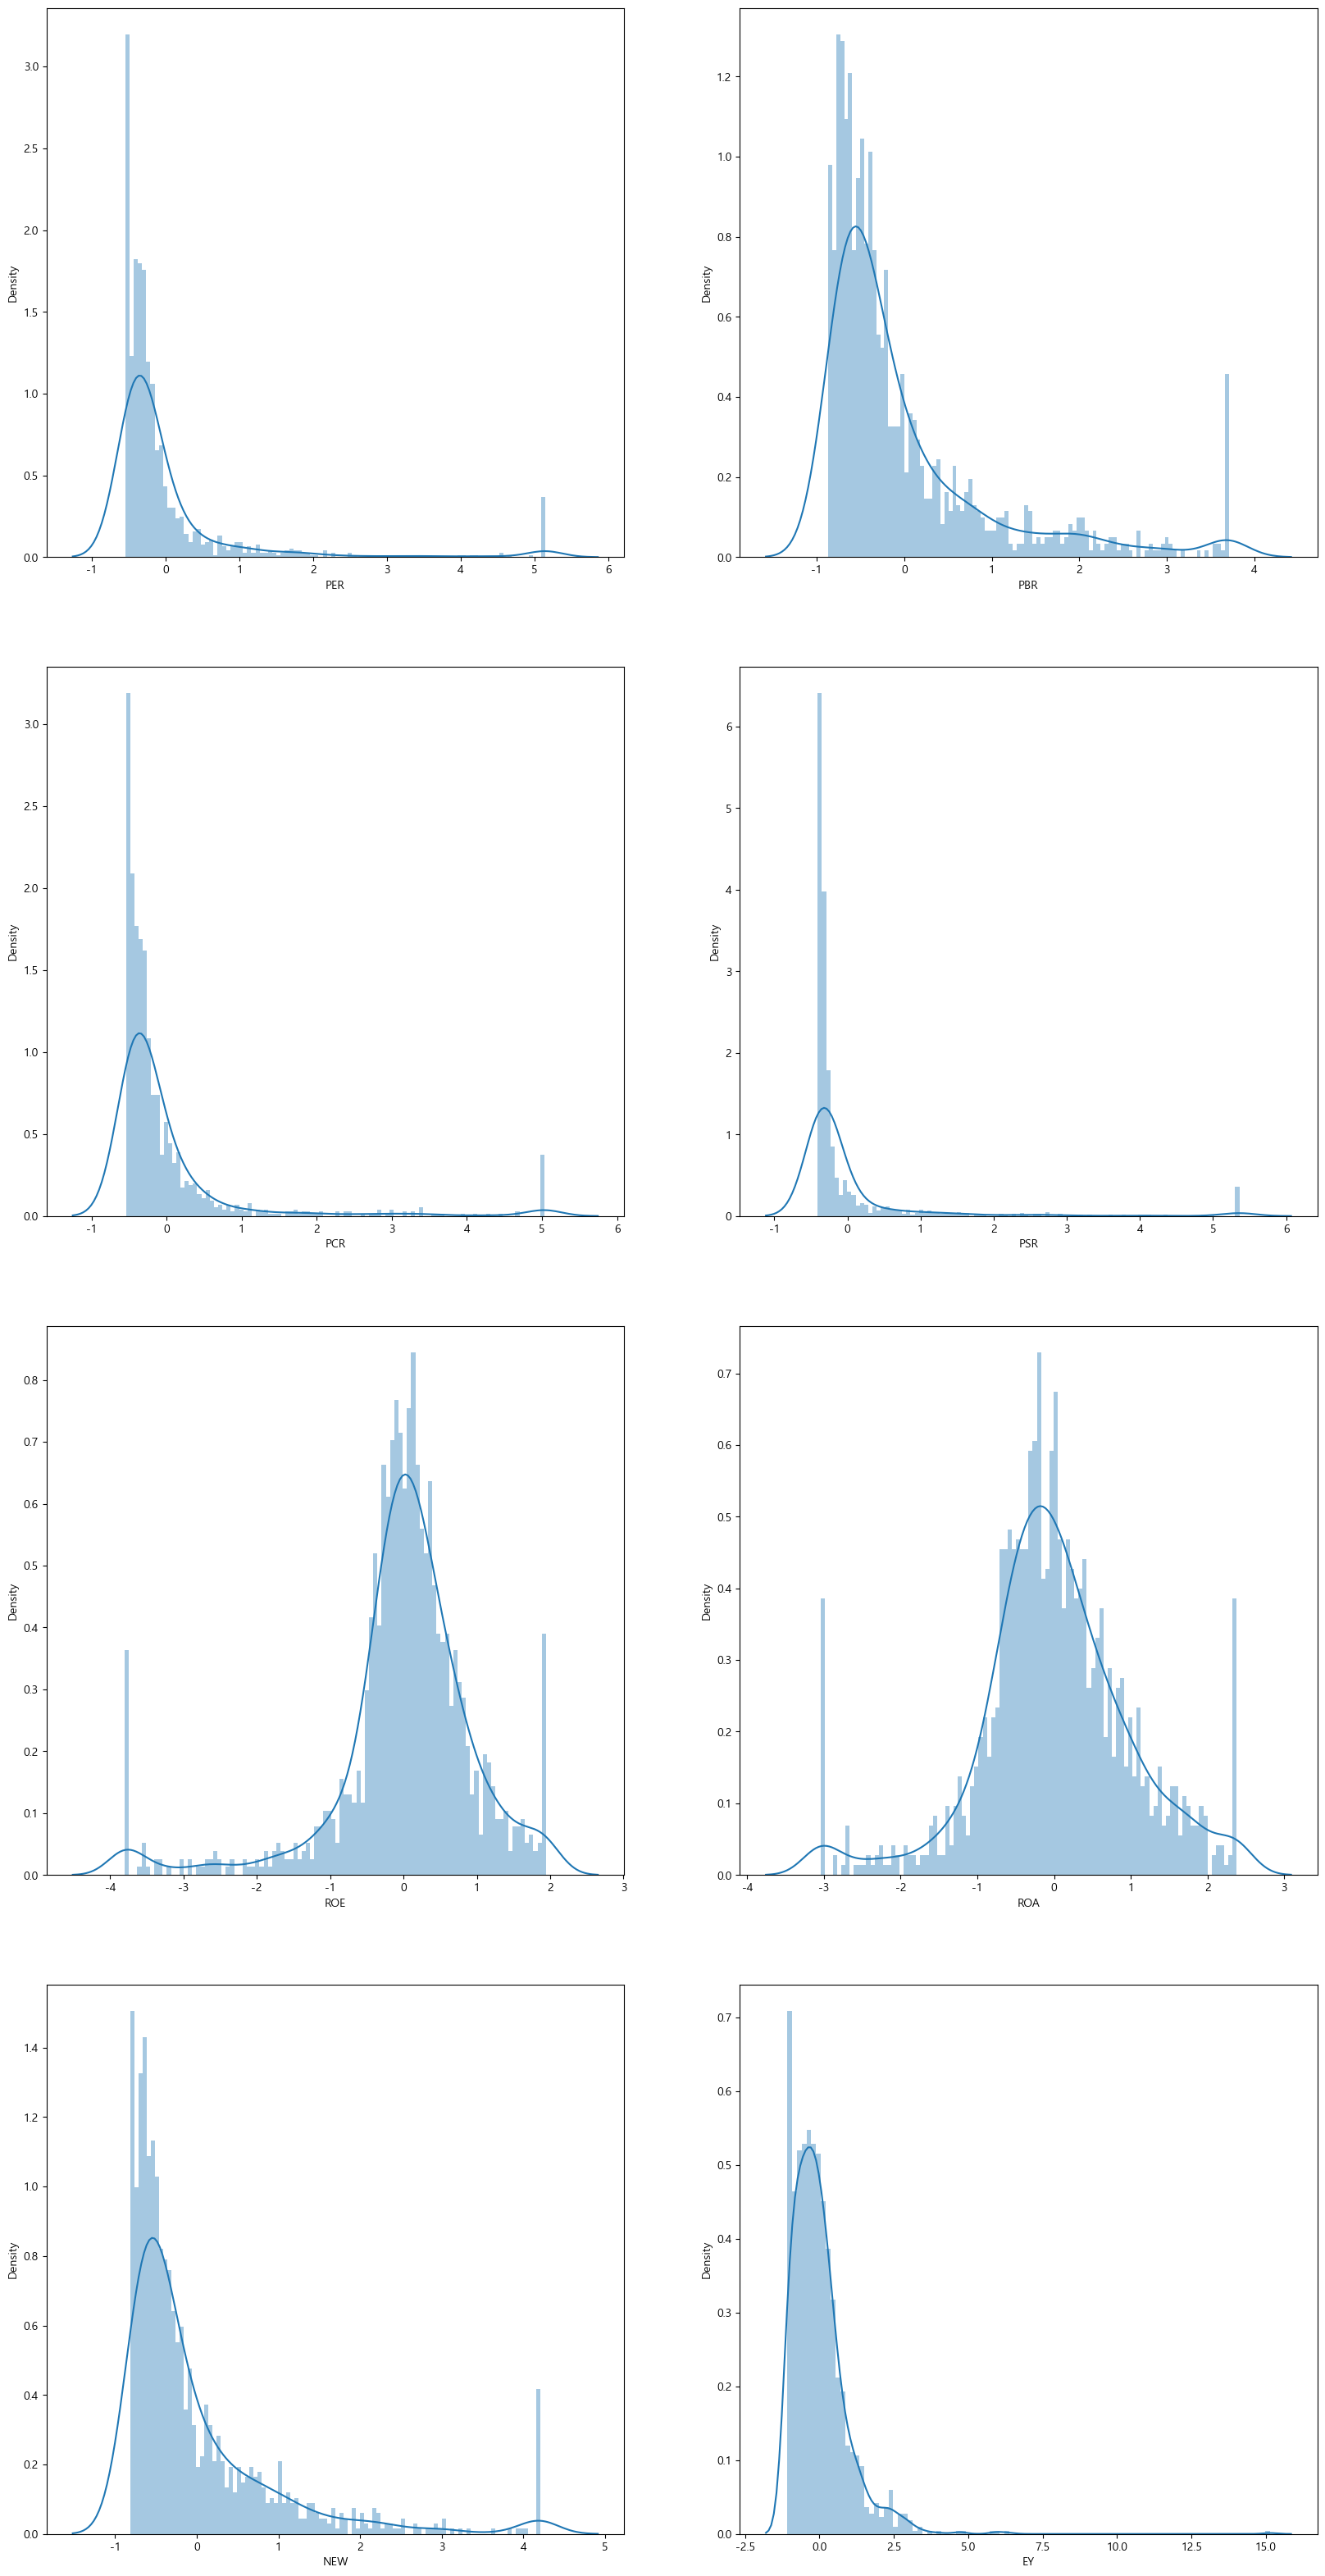

In [770]:
## 윈저라이징 후 distplot (PER == 0 제거)

col_n = 2
row_n = 4

fig, ax = plt.subplots(ncols=col_n, nrows=row_n, figsize=(20,row_n*10))

for i,col in enumerate(sample_kospi_f.columns):
    sns.distplot(sample_kospi_f[col], bins=100, ax=ax[int(i/col_n),int(i%col_n)])